In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
import pandas as pd

# Normal distribution
https://fr.wikipedia.org/wiki/Loi_normale

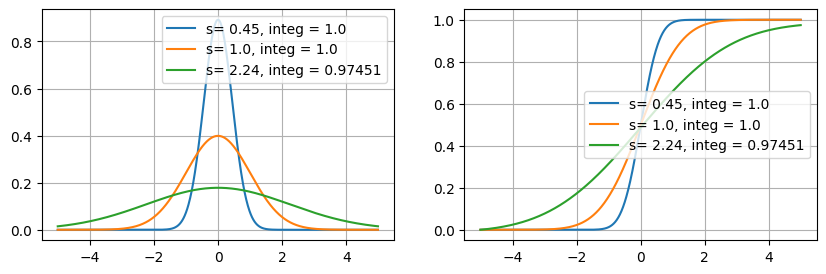

In [2]:
def nor(x, m=0, s=1): 
    return (1/(s*np.sqrt(2*np.pi)))*np.exp(-(1/(2*s**2))*(x-m)**2)
x= np.arange(-5,5,0.01)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
for s in [np.sqrt(0.2),1.,np.sqrt(5)]:

    y=nor(x, m=0,s=s)
    integ= np.trapezoid(y=y, x=x)
    axs[0].plot(x, y, 
    label = "s= "+str(np.float64(s).round(2))+", integ = "+str(integ.round(5)))

    cdf = cumulative_trapezoid(y, x, initial=0)
    axs[1].plot(x, cdf, label = "s= "+str(np.float64(s).round(2))+", integ = "+str(integ.round(5)))
    

axs[0].grid()
axs[0].legend()
axs[1].grid()
axs[1].legend()
plt.show()

# COVOLUTION

In [3]:
from copy import copy

In [4]:
import numpy as np

# Input arrays
array1 = np.array([1, 2, 3])
array2 = np.array([0, 1, 0.5])

# Compute convolution
conv_full = np.convolve(array1, array2, mode='full')
conv_same = np.convolve(array1, array2, mode='same')
conv_valid = np.convolve(array1, array2, mode='valid')

print("Full Convolution:", conv_full)
print("Same Convolution:", conv_same)
print("Valid Convolution:", conv_valid)

Full Convolution: [0.  1.  2.5 4.  1.5]
Same Convolution: [1.  2.5 4. ]
Valid Convolution: [2.5]


In [ ]:
x= np.arange(-5,5,0.01)
array1= (np.abs(x)<=2).astype("float32")/4
np.trapz(array

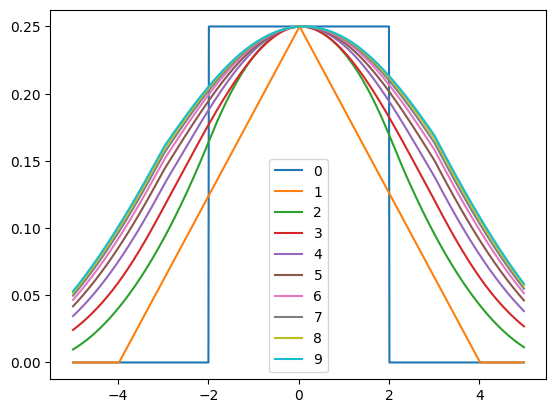

In [5]:



arr1= copy(array1)
arr2= copy(array1)
plt.plot(x, arr1, label = "0")
for i in range(1, 10): 
    arr2= np.convolve(arr1, arr2, mode='same')
    plt.plot(x, 0.25*arr2/arr2.max(), label = str(i))
plt.legend()

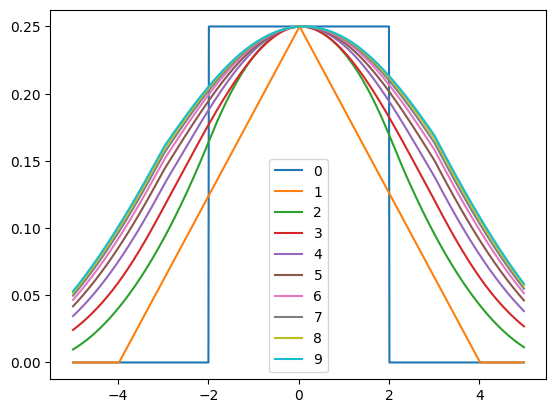

In [6]:
x= np.arange(-5,5,0.01)
array1= (np.abs(x)<=2).astype("float32")/4


arr1= copy(array1)
arr2= copy(array1)
plt.plot(x, arr1, label = "0")
for i in range(1, 10): 
    arr2= np.convolve(arr1, arr2, mode='same')
    plt.plot(x, 0.25*arr2/arr2.max(), label = str(i))
plt.legend()

# Théorème central limite (TCL)

https://www.youtube.com/watch?v=WEF2SgS95N8

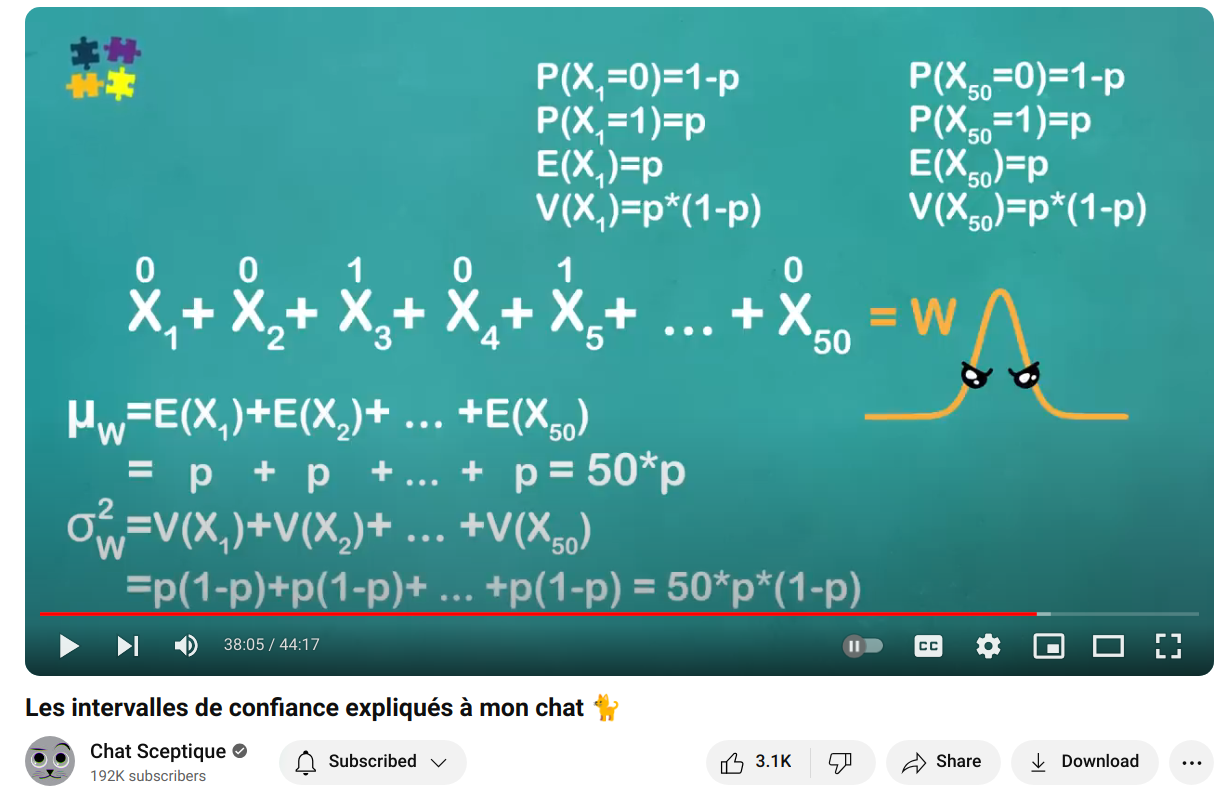

In [169]:
np.random.seed(0)
N=1000
n=50
p=0.7
X=np.random.choice(a=(0,1), size=(n,N), replace=True, p=(1-p, p))
#np.random.randint(0,2, (n,N))
W= X.sum(axis=0)


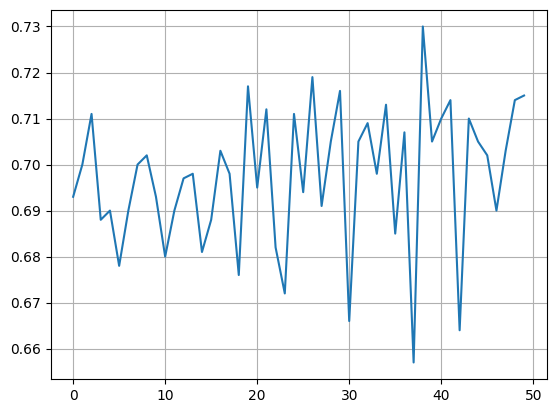

In [170]:
plt.plot(X.mean(1))
plt.grid()

In [171]:
mw =p*X.shape[0]
sw = float(np.sqrt(p*(1-p)*X.shape[0]))
mw, sw
# 25.0, 3.535533905932

(35.0, 3.24037034920393)

In [172]:
W= X.sum(axis=0)
W.shape

(1000,)

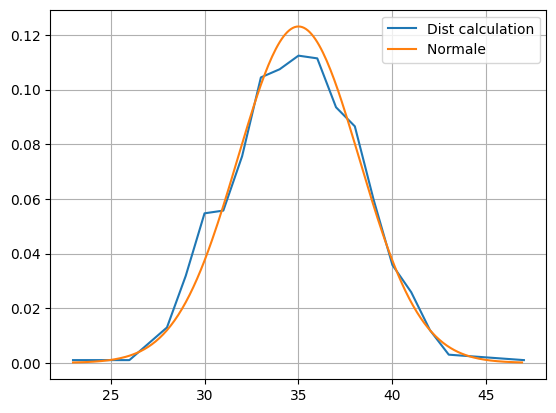

In [173]:

s= pd.Series(W).value_counts().sort_index()

s = s/np.trapezoid(s.to_numpy(), s.index)
s.plot(label = "Dist calculation")

x= np.arange(W.min(), W.max(), 0.1)
x.min() , x.max()
plt.plot( x, nor(x, m=mw, s=sw), label = "Normale ")
plt.legend()
plt.grid()

### Erreur estimation 

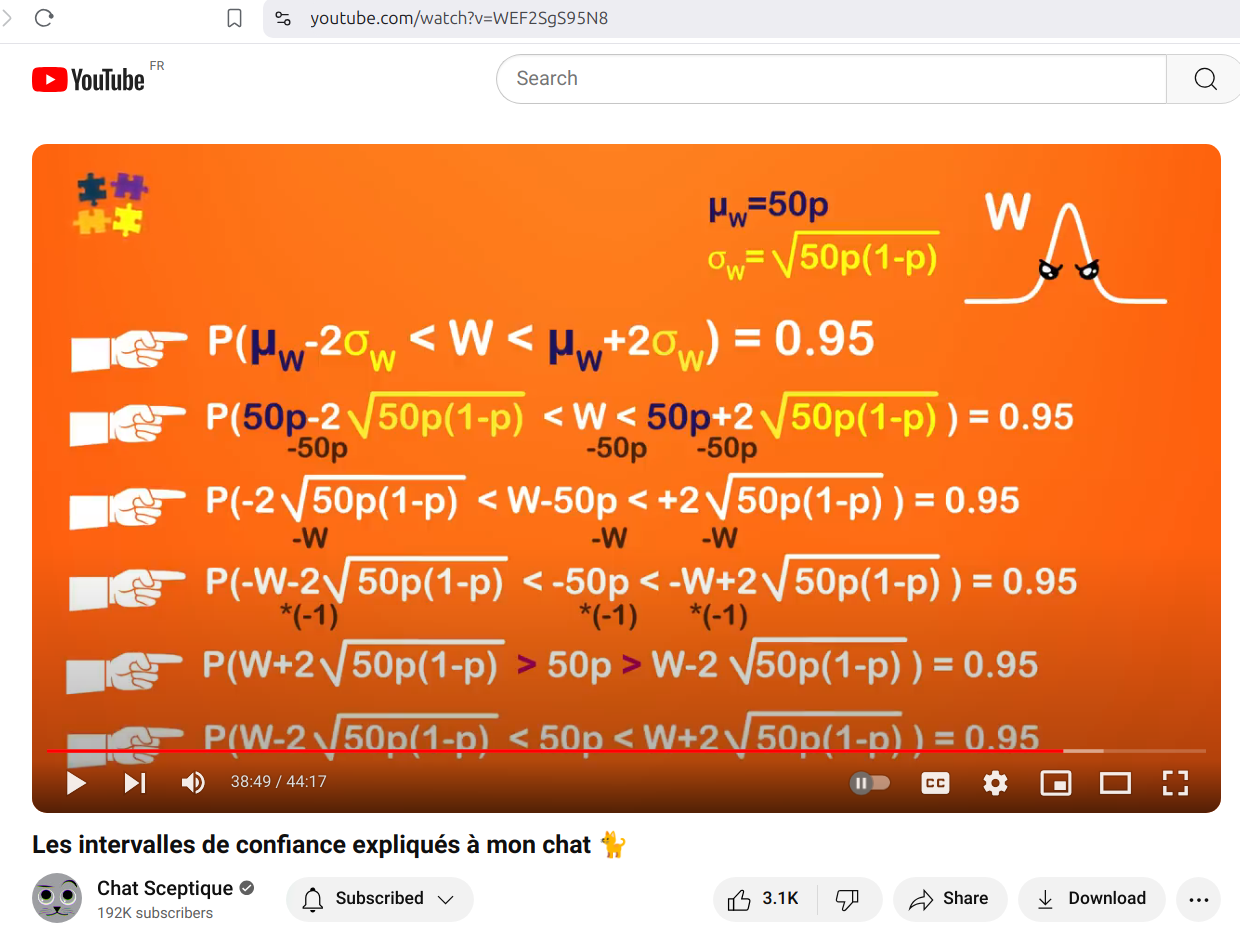

In [174]:
m=0
s=1
x= np.arange(m-2*s,m+2*s,0.0001)
print( float(np.trapezoid(nor(x, m, s), x)), "+/-2s est proche de 0.95")

0.9544943362870464 +/-2s est proche de 0.95


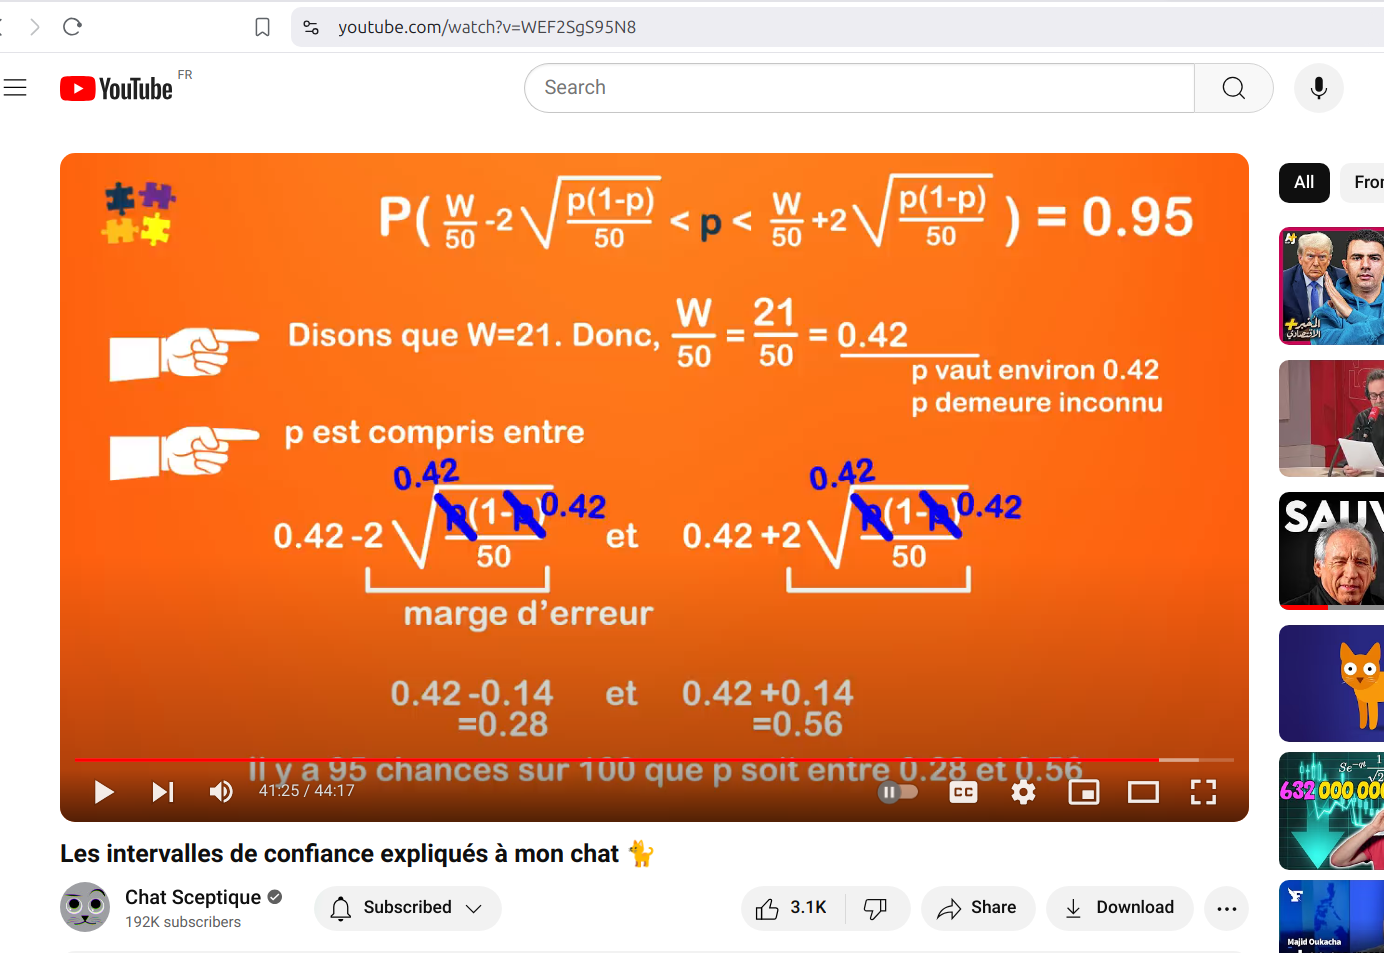

In [175]:
#N=10000
#n=50
#p=0.5
X=np.random.choice(a=(0,1), size=(n,N), replace=True, p=(p, 1-p))
#np.random.randint(0,2, (n,N))
W= X.sum(axis=0)


In [176]:
born_sup= W/n+2*np.sqrt((W/n*(1-W/n))/n)
born_sup[:10]

array([0.53856406, 0.33716655, 0.47398507, 0.60096808, 0.42961481,
       0.4957645 , 0.51728802, 0.42961481, 0.51728802, 0.4957645 ])

In [177]:
born_sup.min()

np.float64(0.21191300234460847)

In [178]:
born_inf= W/n-2*np.sqrt((W/n*(1-W/n))/n)
born_inf[:10]

array([0.26143594, 0.10283345, 0.20601493, 0.31903192, 0.17038519,
       0.2242355 , 0.24271198, 0.17038519, 0.24271198, 0.2242355 ])

In [179]:
born_sup.min()

np.float64(0.21191300234460847)

In [180]:
print(len(born_sup[(born_sup>(1-p)) & (born_inf < (1-p))]) /len(born_sup), "doit être proche de 0.95")

0.954 doit être proche de 0.95


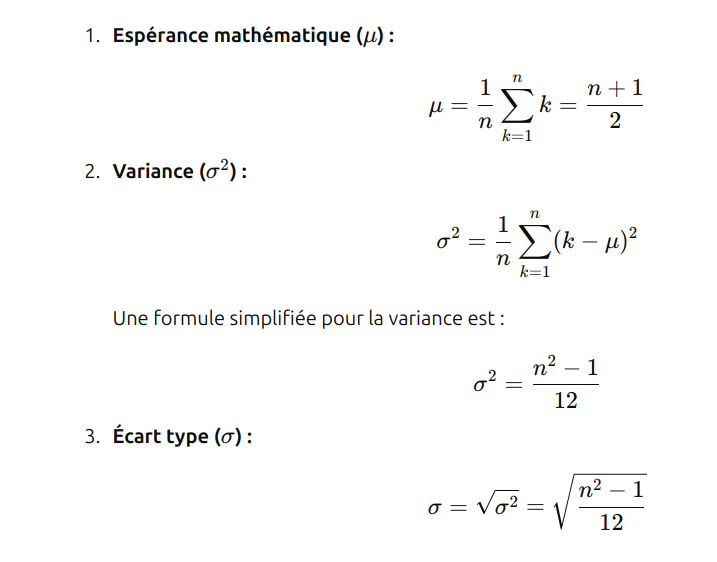

In [219]:
np.random.seed(0)
nbface = 6
N=1000
n=50
p=1/nbface
X=np.random.choice(a=(1,2,3,4,5,6), size=(n,N), replace=True)
#np.random.randint(0,2, (n,N))
W= X.sum(axis=0)


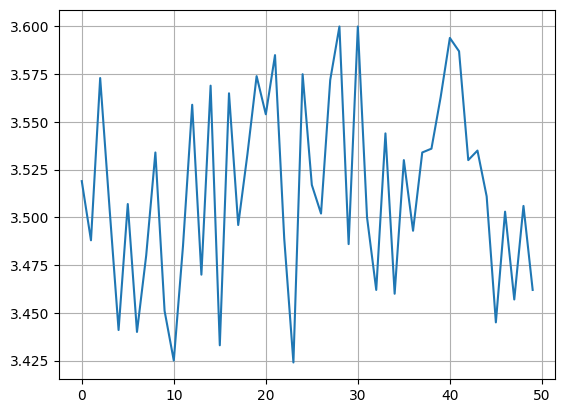

In [212]:
plt.plot(X.mean(1))
plt.grid()

In [220]:
µ= (nbface+1)/2
µ

3.5

In [223]:
si = float (np.sqrt((nbface**2-1)/12))
si 

1.707825127659933

In [226]:
p=1/6
mw =µ*X.shape[0]
sw = float(si*X.shape[0])
mw, sw
# 25.0, 3.535533905932

(175.0, 85.39125638299664)

In [227]:
1+1

2

In [228]:
W= X.sum(axis=0)
W.shape

(1000,)

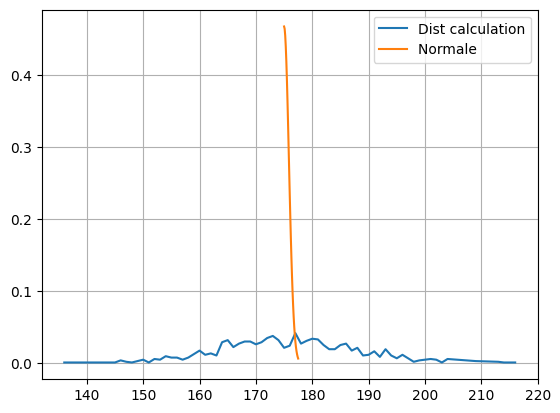

In [230]:

s= pd.Series(W).value_counts().sort_index()

s = s/np.trapezoid(s.to_numpy(), s.index)
s.plot(label = "Dist calculation")

x= np.arange(mw-0.03**sw, mw+0.03*sw, 0.1)
x.min() , x.max()
plt.plot( x, nor(x, m=mw, s=sw/100), label = "Normale ")
plt.legend()
plt.grid()


### Erreur estimation 

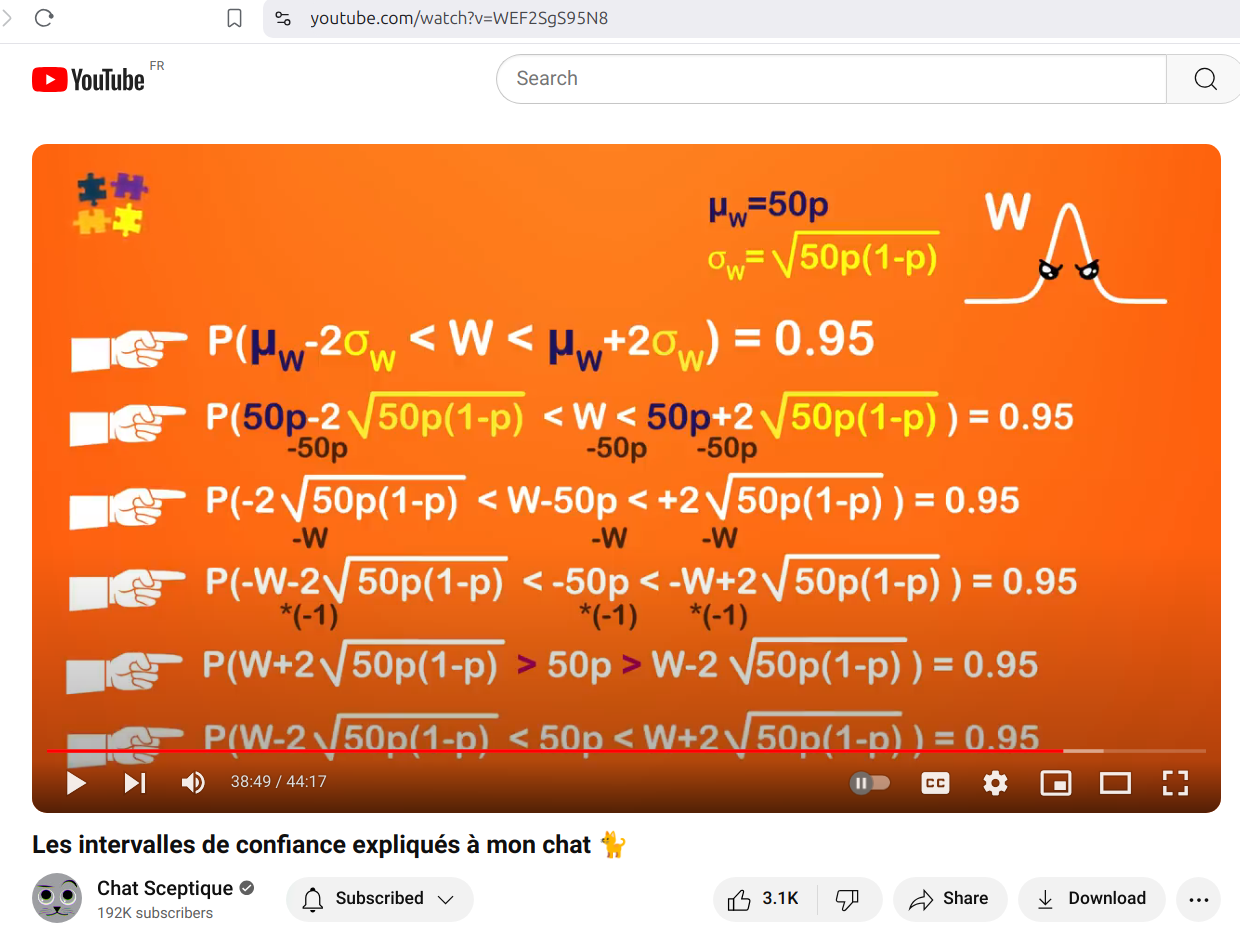

In [207]:
m=0
s=1
x= np.arange(m-2*s,m+2*s,0.0001)
print( float(np.trapezoid(nor(x, m, s), x)), "+/-2s est proche de 0.95")

0.9544943362870464 +/-2s est proche de 0.95


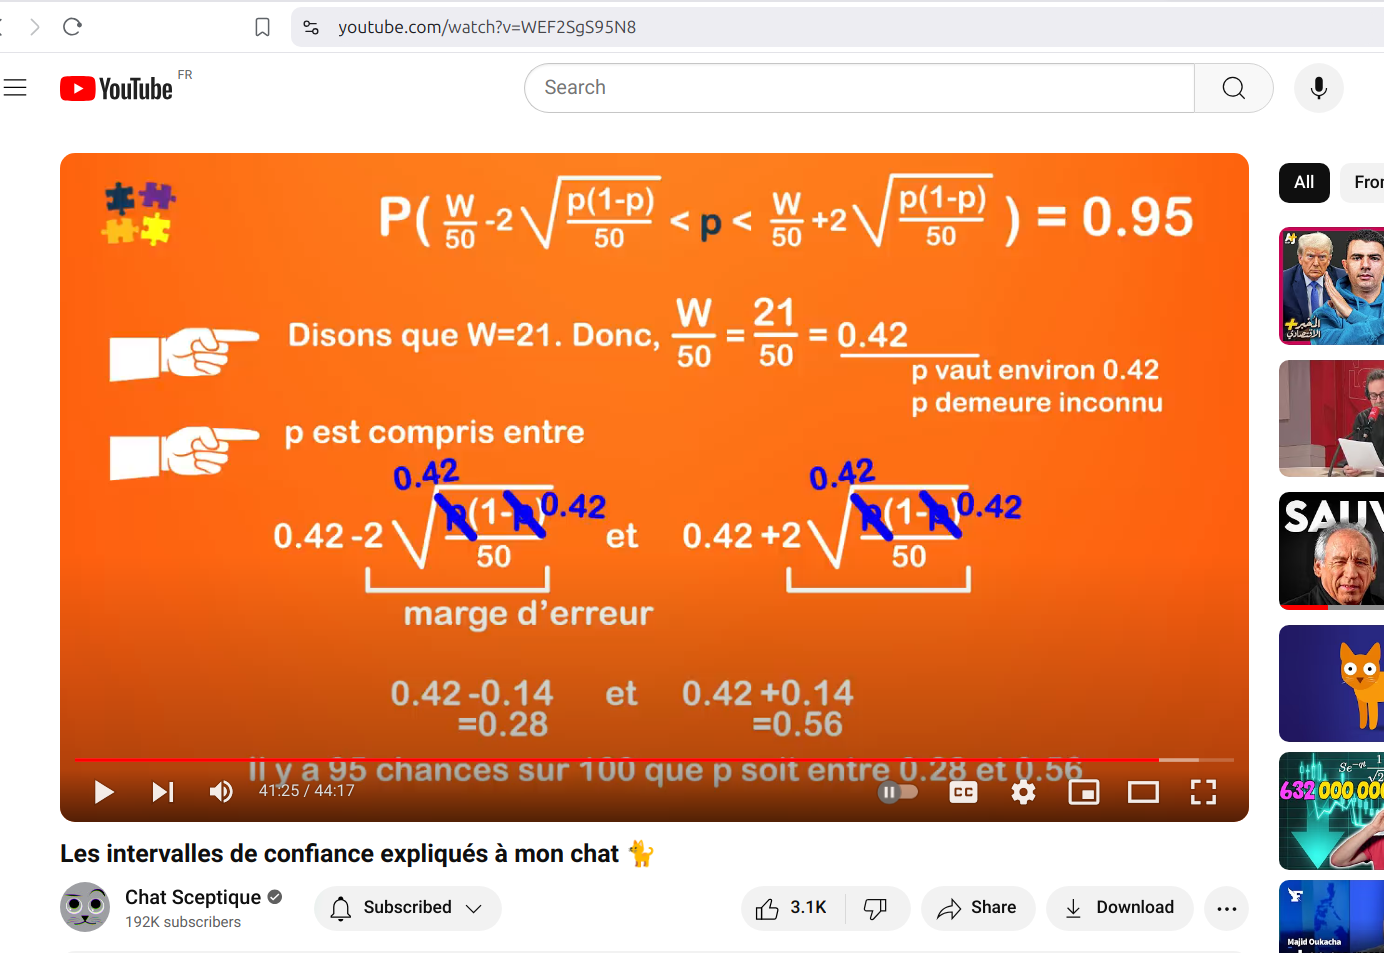

In [208]:
#N=10000
#n=50
#p=0.5
X=np.random.choice(a=(0,1), size=(n,N), replace=True, p=(p, 1-p))
#np.random.randint(0,2, (n,N))
W= X.sum(axis=0)


In [176]:
born_sup= W/n+2*np.sqrt((W/n*(1-W/n))/n)
born_sup[:10]

array([0.53856406, 0.33716655, 0.47398507, 0.60096808, 0.42961481,
       0.4957645 , 0.51728802, 0.42961481, 0.51728802, 0.4957645 ])

In [177]:
born_sup.min()

np.float64(0.21191300234460847)

In [178]:
born_inf= W/n-2*np.sqrt((W/n*(1-W/n))/n)
born_inf[:10]

array([0.26143594, 0.10283345, 0.20601493, 0.31903192, 0.17038519,
       0.2242355 , 0.24271198, 0.17038519, 0.24271198, 0.2242355 ])

In [179]:
born_sup.min()

np.float64(0.21191300234460847)

In [180]:
print(len(born_sup[(born_sup>(1-p)) & (born_inf < (1-p))]) /len(born_sup), "doit être proche de 0.95")

0.954 doit être proche de 0.95
